In [1]:
import torch
import pytorch_lightning as pl
import numpy as np
from gensim.models import Word2Vec
from train import Lightning
from sklearn.preprocessing import normalize


In [2]:
# w2v = Word2Vec.load('data/w2v/news_200d.bin')
model = Lightning.load_from_checkpoint('lightning_logs/exp2_alpha_0.3/version_0/checkpoints/epoch=0.ckpt')
doc_encoder = model.nrms.doc_encoder
# w2id = {key: w2v.wv.vocab[key].index for key in w2v.wv.vocab}
# id2w = {v: k for k, v in w2id.items()}
embedding = doc_encoder.embedding.weight.detach().numpy()[:4000]
asp_center = doc_encoder.autoencoder.aspect_embed.weight.detach().numpy()
print(embedding.shape)

(4000, 200)


In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500, method='exact')
total = np.concatenate((asp_center, embedding))
total = normalize(total)
low_dim_embs = tsne.fit_transform(total)
low_asp, low_emb = low_dim_embs[:asp_center.shape[0]], low_dim_embs[asp_center.shape[0]:]
# labels = 

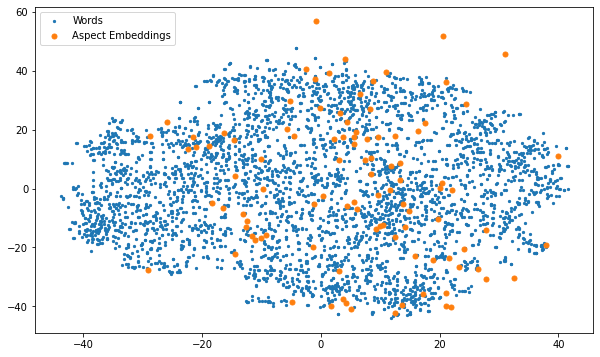

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(low_dim_embs[:,0], low_dim_embs[:,1], s=5, norm=True, label='Words')
plt.scatter(low_asp[:,0], low_asp[:,1], s=25, norm=True, label='Aspect Embeddings')
plt.legend(loc=2, , fontsize=15)
plt.savefig('img/tsna_aspect_embed.png', ppi=300)




ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 1000

In [7]:
asp_center.shape, embedding.shape

((100, 200), (4000, 200))